In [15]:
import numpy as np
from scipy.sparse import * 
from scipy.sparse.linalg import *
from scipy.linalg import *
import matplotlib.pyplot as plt


In [16]:
n=500

a=0
b=10

def f(x):
  return x**2#np.sin(3*np.pi*x)
x= np.sort(np.append(np.random.rand(n-1),[0.,1.]))

In [17]:
def solve_dirichlet(x,alpha,beta, fx):
  h=np.zeros(len(x)-1)
  for i in range(len(h)):
    h[i]= x[i+1]-x[i]

  hbar = np.zeros(len(h)-1)
  for  i in range(len(hbar)):
    hbar[i]= (h[i+1]+h[i])/2


  dim = len(hbar)
  f=np.zeros(dim)
  len(f)
  f[0] = fx(x[1])*hbar[0]+ alpha/h[0]
  f[-1] = fx(x[-2])*hbar[-1] +beta/h[-1]

  A = np.zeros(dim*dim).reshape((dim,dim))

  A[0][0] = 1/h[0] +1/h[1]+ hbar[0]
  A[0][1] = -1/h[1]

  A[-1][-2]= -1/h[-2] 
  A[-1][-1] = 1/h[-2]+ 1/h[-1]+hbar[-1]

  for  j in range(1,len(A)-1):
    A[j][j-1] = -1/h[j]
    A[j][j] = 1/h[j]+ 1/h[j+1] +hbar[j]
    A[j][j+1] =  -1/h[j+1]

    f[j] = fx(x[j+1])*hbar[j] 

  u=spsolve(A,f)
  u=np.insert(u,0,alpha)
  u=np.insert(u,len(u),beta)

  return x,u


In [18]:
def solve_ghost(n,alpha,beta, fx):
  h = 1/n
  x=np.arange(0,1+h,h)
  dim = len(x) -1
  f = np.zeros(dim)
  A = np.zeros(dim*dim).reshape((dim,dim))

  f[0] = (1/2)*fx(x[0])- alpha/h
  f[-1] =  fx(x[-1]) + beta/h**2
  np.fill_diagonal(A,2/h**2)
  A[0][0] =  1/h**2
  A[0][1] =  -1/h**2
  A[-1][-2] =  -1/h**2
  for i in range(1,len(A)-1):
    A[i][i-1] = -1/h**2
    A[i][i+1] = -1/h**2
    f[i] =  fx(x[i])

  u=spsolve(A,f)
  u=np.insert(u,len(u),beta)

  return x,u

In [19]:
def solve_forward(n,alpha,beta, fx):
  h = 1/n
  x=np.arange(0,1+h,h)
  dim = len(x) -1
  f = np.zeros(dim)
  A = np.zeros(dim*dim).reshape((dim,dim))

  f[0] = alpha
  f[-1] =  fx(x[-1]) + beta/h**2
  np.fill_diagonal(A,2/h**2)
  A[0][0] =  -1/h
  A[0][1] =  1/h
  A[-1][-2] =  -1/h**2
  for i in range(1,len(A)-1):
    A[i][i-1] = -1/h**2
    A[i][i+1] = -1/h**2
    f[i] =  fx(x[i])

  u=spsolve(A,f)
  u=np.insert(u,len(u),beta)

  return x,u

In [20]:
n=100

alpha=1
beta=0

def solution(x):
  return -np.exp(-x) + 1/np.exp(1)
def fx(x):
  return np.exp(-x)
#x= np.sort(np.append(np.random.rand(n-1),[0.,1.]))

In [21]:
x= np.sort(np.append(np.random.rand(n-1),[0.,1.]))
def wrapper(n,alpha,beta,rhs, solver,solution):
  xs=[]
  us=[]
  norms=[]
  #hmax=[]
  h=[]
  for i in range(len(n)):
    x= np.arange(0,1,1/n[i])
 
    h.append(1/n[i])
    res = solver(n[i],alpha,beta, rhs)
    xs.append(res[0])
    us.append(res[1])
    error = np.abs(solution(res[0])- res[1])
    norms.append(norm((error),ord=np.inf))  



  return h, norms



## Ghost and forward

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


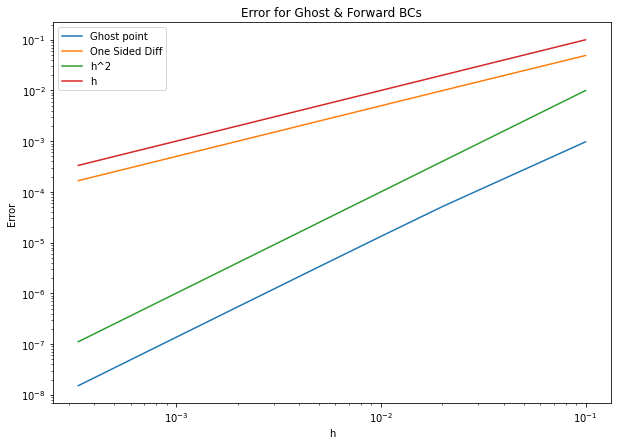

In [22]:
alpha=1
beta=0

def sqr(h):
  hsq= np.zeros(len(h))
  for i in range(len(h)):
    hsq[i]= h[i]**2
  return hsq

def solution(x):
  return -np.exp(-x) + 1/np.exp(1)
def fx(x):
  return np.exp(-x)
def wrapper(n,alpha,beta,rhs, solver,solution):
  xs=[]
  us=[]
  norms=[]

  h=[]
  for i in range(len(n)):
    x= np.arange(0,1,1/n[i])
 
    h.append(1/n[i])
    res = solver(n[i],alpha,beta, rhs)
    xs.append(res[0])
    us.append(res[1])
    error = np.abs(solution(res[0])- res[1])
    norms.append(norm((error),ord=np.inf))  
  return h, norms

h,norms_forward=wrapper([10,50,100,200,500,1000,2000,3000],1,0,fx,solve_forward,solution)
h,norms_ghost=wrapper([10,50,100,200,500,1000,2000,3000],1,0,fx,solve_ghost,solution)
plt.figure(figsize=(10,7))
plt.plot(h,norms_ghost,label="Ghost point")
plt.plot(h,norms_forward,label='One Sided Diff')
plt.plot(h,sqr(h),label='h^2')
plt.plot(h,h,label='h')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('h')
plt.ylabel("Error")
plt.title('Error for Ghost & Forward BCs')
plt.savefig('Ghost and forward.png')

## Uniform vs non uniform Dirichlet

In [23]:
k=1
def solution(x):
  return (1/(np.pi**2*k**2))*np.sin(k*np.pi*x)
  
  return 
def fx(x):
  return np.sin(k*np.pi*x)

def wrapper_nonUniform(n,alpha,beta,rhs, solver,solution):
  xs=[]
  us=[]
  norms=[]
  hmax=[]
  for i in range(len(n)):
    x= np.sort(np.append(np.random.rand(n[i]-1),[0.,1.]))
    h=np.zeros(len(x)-1)
    for j in range(len(x)-1):
      h[j] = x[j+1] - x[j]
    hmax.append(max(h))
    res = solver(x,alpha,beta, rhs)
    xs.append(res[0])
    us.append(res[1])
    error = np.abs(solution(res[0])- res[1])
    norms.append(norm((error),ord=np.inf))  
  return hmax, norms

In [24]:
non_h, non_norms= wrapper_nonUniform([10,50,100,200,500,1000,2000,3000],0,0,fx,solve_dirichlet,solution)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


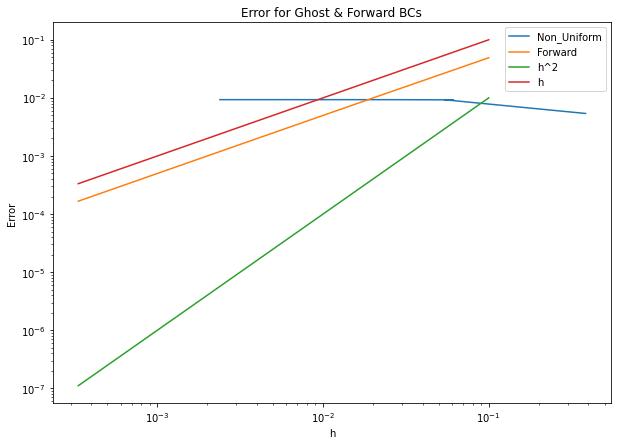

In [25]:
plt.figure(figsize=(10,7))
plt.plot(non_h,non_norms,label="Non_Uniform")
plt.plot(h,norms_forward,label='Forward')
plt.plot(h,sqr(h),label='h^2')
plt.plot(h,h,label='h')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('h')
plt.ylabel("Error")
plt.title('Error for Ghost & Forward BCs')
plt.savefig('Ghost point.png')